In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
import seaborn as sns

In [2]:
df = pd.read_csv('../data/raw/data.csv')
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


## Data Overview

In [5]:
df.shape

(95662, 16)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

In [9]:
df.describe()

,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


In [16]:
cat_df = df.select_dtypes(include='object')

In [17]:
for col in cat_df.columns:
    print(f"Unique values in '{col}':")
    print(cat_df[col].unique())
    print()

Unique values in 'TransactionId':
['TransactionId_76871' 'TransactionId_73770' 'TransactionId_26203' ...
 'TransactionId_82501' 'TransactionId_136354' 'TransactionId_35670']

Unique values in 'BatchId':
['BatchId_36123' 'BatchId_15642' 'BatchId_53941' ... 'BatchId_118602'
 'BatchId_70924' 'BatchId_29317']

Unique values in 'AccountId':
['AccountId_3957' 'AccountId_4841' 'AccountId_4229' ... 'AccountId_557'
 'AccountId_2476' 'AccountId_1685']

Unique values in 'SubscriptionId':
['SubscriptionId_887' 'SubscriptionId_3829' 'SubscriptionId_222' ...
 'SubscriptionId_4806' 'SubscriptionId_3567' 'SubscriptionId_84']

Unique values in 'CustomerId':
['CustomerId_4406' 'CustomerId_4683' 'CustomerId_988' ... 'CustomerId_893'
 'CustomerId_2892' 'CustomerId_2067']

Unique values in 'CurrencyCode':
['UGX']

Unique values in 'ProviderId':
['ProviderId_6' 'ProviderId_4' 'ProviderId_1' 'ProviderId_5'
 'ProviderId_3' 'ProviderId_2']

Unique values in 'ProductId':
['ProductId_10' 'ProductId_6' 'ProductId

ChannelId , ProductCategory , ProviderId are  Low-Cardinality Categorical Features
CurrencyCode should be removed

## Summary Statistics

In [18]:
num_df = df.select_dtypes(include=[np.number])
num_df.head()

,CountryCode,Amount,Value,PricingStrategy,FraudResult
0,256,1000.0,1000,2,0
1,256,-20.0,20,2,0
2,256,500.0,500,2,0
3,256,20000.0,21800,2,0
4,256,-644.0,644,2,0


In [23]:
num_df['CountryCode'].value_counts()

CountryCode
256    95662
Name: count, dtype: int64

In [25]:
num_df.head()

,CountryCode,Amount,Value,PricingStrategy,FraudResult
0,256,1000.0,1000,2,0
1,256,-20.0,20,2,0
2,256,500.0,500,2,0
3,256,20000.0,21800,2,0
4,256,-644.0,644,2,0


In [32]:
df = df.drop(columns='CountryCode')
num_df = num_df.drop(columns='CountryCode')

In [34]:
df = df.drop(columns='CurrencyCode')

In [35]:
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [36]:
num_df.head()

,Amount,Value,PricingStrategy,FraudResult
0,1000.0,1000,2,0
1,-20.0,20,2,0
2,500.0,500,2,0
3,20000.0,21800,2,0
4,-644.0,644,2,0


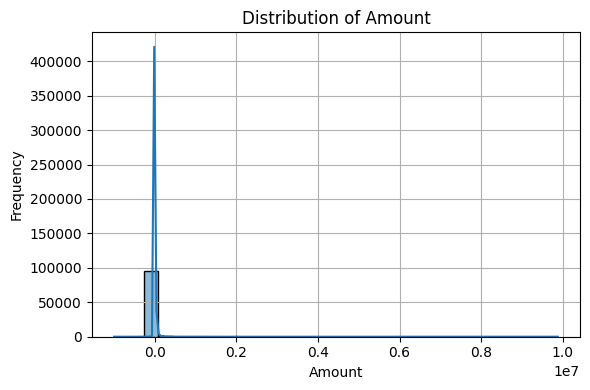

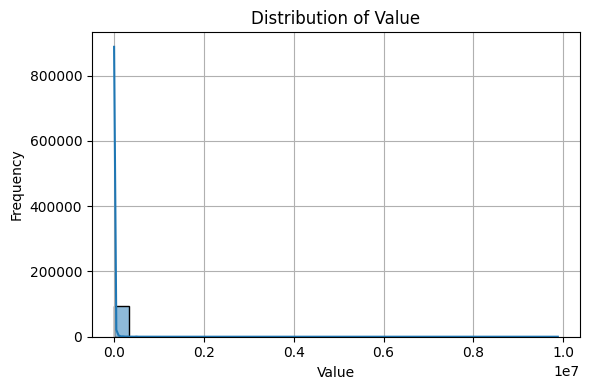

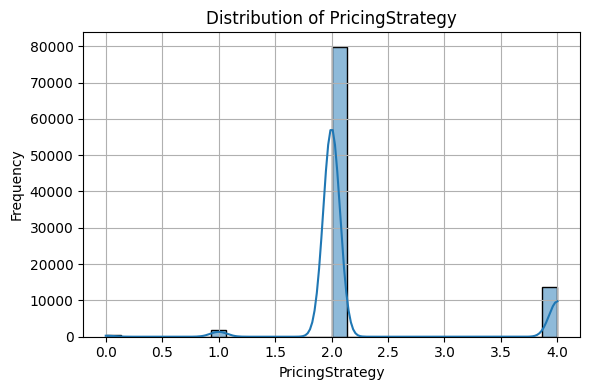

In [40]:
num_cols = ['Amount', 'Value', 'PricingStrategy']

for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

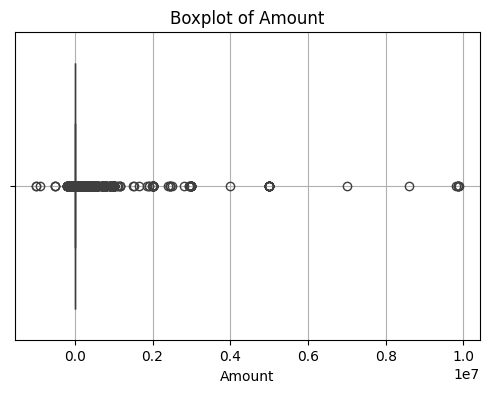

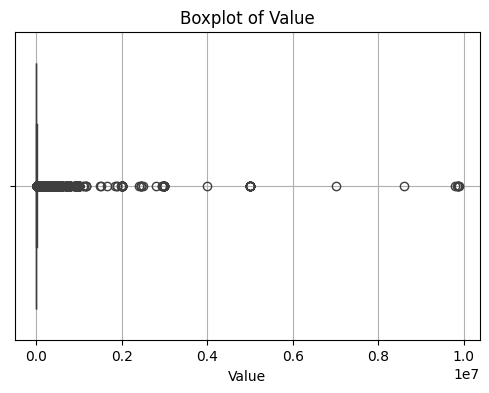

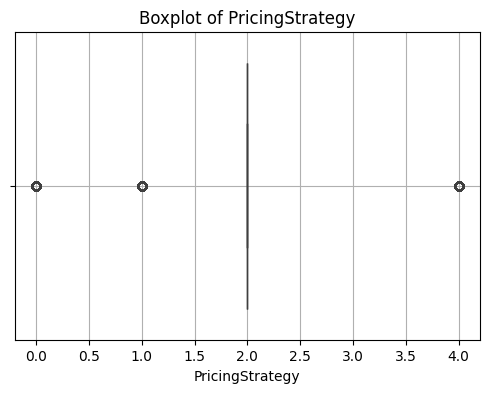

In [41]:
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.grid(True)
    plt.show()

There is no amount of fraud on pricing strategy 2

### BiVariate Analysis

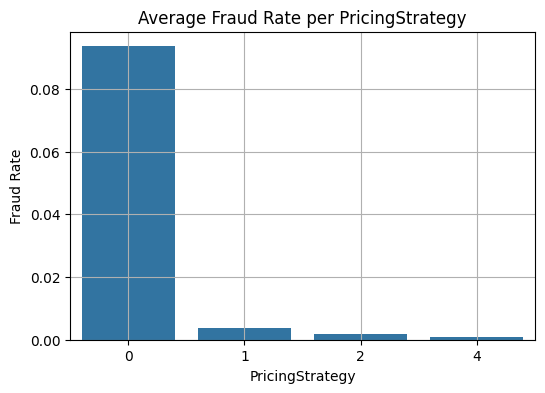

In [46]:
# Group by PricingStrategy and compute fraud rate
fraud_rate = df.groupby('PricingStrategy')['FraudResult'].mean().reset_index()

plt.figure(figsize=(6, 4))
sns.barplot(x='PricingStrategy', y='FraudResult', data=fraud_rate)
plt.title('Average Fraud Rate per PricingStrategy')
plt.ylabel('Fraud Rate')
plt.grid(True)
plt.show()


It is clear that when pricing strategy increased the fraud decreases.

In [48]:
fraud_by_amount = num_df.groupby('FraudResult')['Amount'].sum()
fraud_by_amount.head()

FraudResult
0    346335054.5
1    296307571.0
Name: Amount, dtype: float64

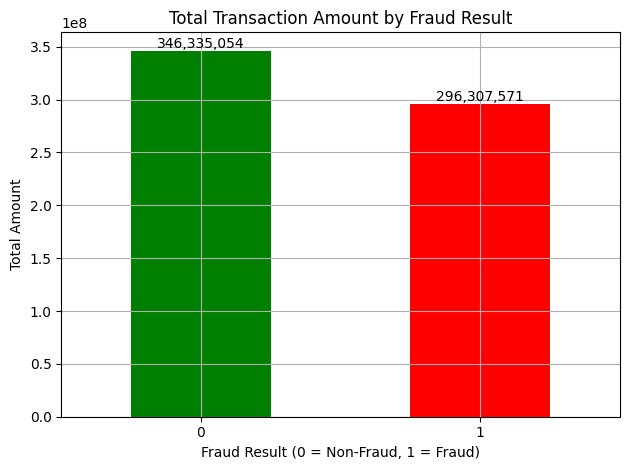

In [50]:
fraud_by_amount.plot(kind='bar', color=['green', 'red'])

# Add labels and title
plt.title('Total Transaction Amount by Fraud Result')
plt.xlabel('Fraud Result (0 = Non-Fraud, 1 = Fraud)')
plt.ylabel('Total Amount')
plt.xticks(rotation=0)
plt.grid(True)

# Show values on top of bars
for idx, value in enumerate(fraud_by_amount):
    plt.text(idx, value, f'{value:,.0f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

There is high amount of fraud transaction

In [43]:
df['PricingStrategy'].value_counts()

PricingStrategy
2    79848
4    13562
1     1867
0      385
Name: count, dtype: int64

Pricing strategy ranges from 0 to 4 except 3

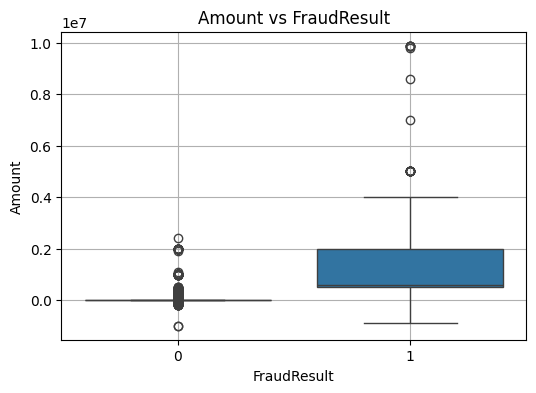

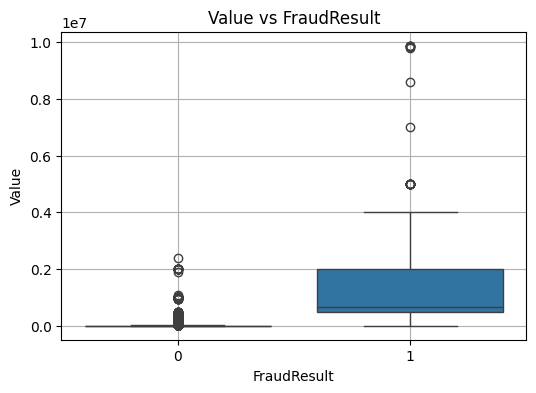

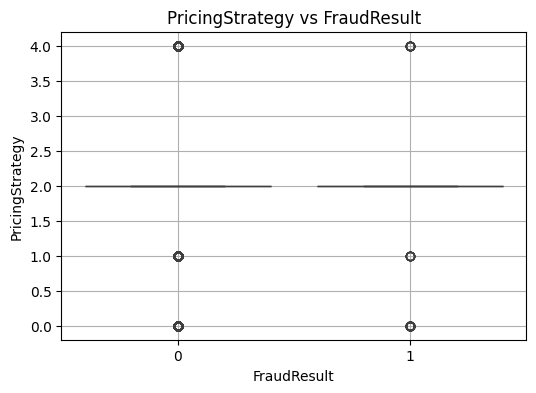

In [44]:
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='FraudResult', y=col, data=df)
    plt.title(f'{col} vs FraudResult')
    plt.grid(True)
    plt.show()